In [4]:
import numpy as np
import pandas as pd 

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

In [5]:
# package = pd.read_csv('../../data/wisata/package_tourism.csv')
rating = pd.read_csv('../../data/rating.csv')
place = pd.read_csv('../../data/wisata.csv')
user = pd.read_csv('../../data/user.csv')

In [6]:
# Melihat gambaran data place

place.head()

,Place_Id,Place_Name,Description,Category,City,Rating,Coordinate,Lat,Long,Price,Image
0,1,The Keranjang Bali,Disini Anda akan dapat menemukan banyak spot y...,Rekreasi,Bali,4.0,"{'lat' : -8731451, 'lng': 115178175}",-873145,115178175,150000,https://arsitagx-master.s3.ap-southeast-1.amaz...
1,2,Bukit Campuhan,Perbukitan yang hijau dipenuhi dengan pepohona...,Cagar Alam,Bali,NaN,"{'lat' :-873145, 'lng: 11525503}",-849933,11525503,0,https://3.bp.blogspot.com/-BJETbctdU3k/VcF9eXe...
2,3,Pantai Pandawa,Pantai Pandawa yang berpasir putih ini cukup p...,Bahari,Bali,4.6,"{'lat' : -884527, 'lng': 11518707}",-884527,11518707,8000,https://arifsetiawan.com/wp-content/uploads/20...
3,4,Waterbom Bali,Wisata taman air di Pulau Bali ini sudah 3 tah...,Bahari,Bali,4.7,"{'lat' : -872857, 'lng' : 11516938}",-872857,11516938,220000,https://www.whitewaterwest.com/wp-content/uplo...
4,5,Garuda Wisnu Kencana,Garuda Wisnu Kencana atau GWK merupakan salah ...,Sejarah,Bali,4.5,"{'lat' : -881041, 'lng' : 11516760}",-881041,11516760,95000,https://img.jakpost.net/c/2018/11/28/2018_11_2...


In [7]:
# Merubah data agar hanya dari Kota Yogyakarta

place = place[place['City']=='Yogyakarta']
place.head()

,Place_Id,Place_Name,Description,Category,City,Rating,Coordinate,Lat,Long,Price,Image
20,21,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,4.5,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-78.006.715,1103676551,6000,https://idetrips.com/wp-content/uploads/2018/0...
21,22,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,4.6,"{'lat': -7.8052845, 'lng': 110.3642031}",-78.052.845,1103642031,15000,http://www.justgoindonesia.com/wp-content/uplo...
22,23,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,4.2,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-77.672.973,1103542486,20000,https://www.sobatjogja.com/wp-content/uploads/...
23,24,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,4.6,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-78.002.016,1103663044,3000,https://www.dejogjaadventure.com/wp-content/up...
24,25,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,4.4,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-78.163.156,1103871442,50000,https://sanjayatour.com/wp-content/uploads/202...


In [8]:
# melihat gambaran data rating

rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [9]:
# Merubah data rating agar hanya berisi rating pada tempat wisata dari Kota Yogyakarta

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,21,2
1,15,21,2
2,20,21,3
3,40,21,4
4,44,21,4


In [10]:
# Melihat ukuran dataset rating untuk Kota Yogyakarta

rating.shape

(2795, 3)

In [11]:
# Melihat gambaran data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [12]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Yogyakarta

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
46,2,"Bekasi, Jawa Barat",21
69,3,"Cirebon, Jawa Barat",23
477,4,"Bekasi, Jawa Barat",21
144,5,"Lampung, Sumatera Selatan",20


In [13]:
# Melihat dataset user yang pernah memberi rating pada wisata di Kota Yogyakarta

user.shape

(300, 3)

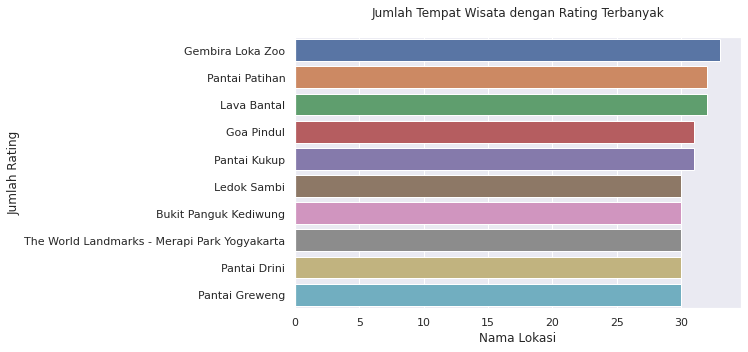

In [14]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

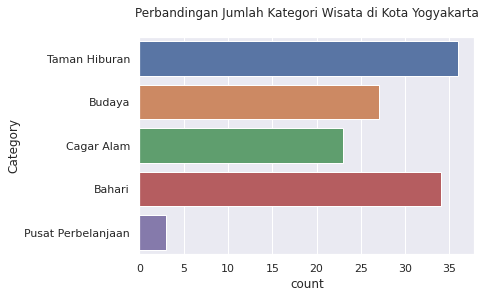

In [15]:
# Membuat visualisasi jumlah kategori wisata di Kota Yogyakarta

sns.countplot(y='Category', data=place)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Yogyakarta', pad=20)
plt.show()

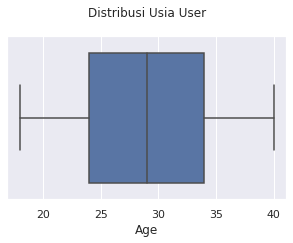

In [16]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

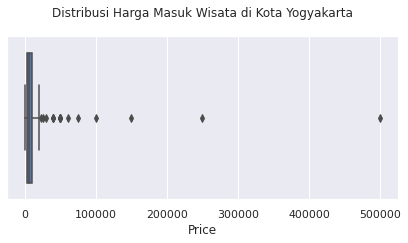

In [17]:
# Membuat visualisasi distribusi harga masuk tempat wisata

plt.figure(figsize=(7,3))
sns.boxplot(place['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Yogyakarta', pad=20)
plt.show()

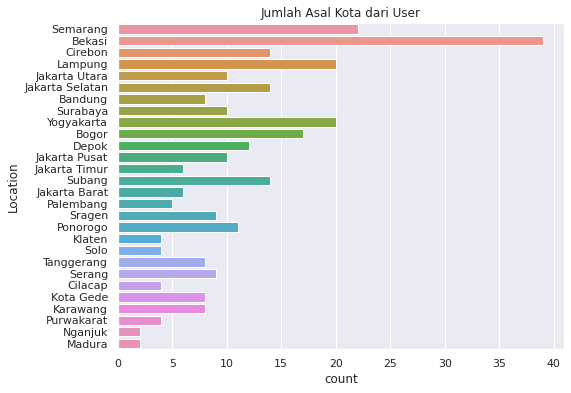

In [18]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

 # MODELING

In [31]:
# Membaca dataset untuk dilakukan encoding
 
df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,1,21,2
1,15,21,2
2,20,21,3
3,40,21,4
4,44,21,4


In [32]:
#ENCODING
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [33]:
# ENCODING + MAPING 

# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [34]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [35]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
 
# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])
 
print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 123, Min Rating: 1.0, Max Rating: 5.0


In [36]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings,user,place
1025,5,67,4.0,112,44
2407,127,128,4.0,183,104


In [37]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [38]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
    x = dot_user_places + user_bias + places_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [39]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

2022-06-09 10:33:04.835674: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-09 10:33:04.835745: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-09 10:33:04.835799: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wan): /proc/driver/nvidia/version does not exist


In [40]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

In [41]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
70/70 [==============================] - 2s 7ms/step - loss: 0.7161 - root_mean_squared_error: 0.3587 - val_loss: 0.7135 - val_root_mean_squared_error: 0.3635
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 0.7076 - root_mean_squared_error: 0.3533 - val_loss: 0.7136 - val_root_mean_squared_error: 0.3636
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.7077 - root_mean_squared_error: 0.3536 - val_loss: 0.7135 - val_root_mean_squared_error: 0.3635
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.7075 - root_mean_squared_error: 0.3532 - val_loss: 0.7118 - val_root_mean_squared_error: 0.3625
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 0.7089 - root_mean_squared_error: 0.3544 - val_loss: 0.7111 - val_root_mean_squared_error: 0.3620
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.7023 - root_mean_squared_error: 0.3499 - val_loss: 0.7101 - val_root_m

Epoch 49/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6685 - root_mean_squared_error: 0.3255 - val_loss: 0.7090 - val_root_mean_squared_error: 0.3605
Epoch 50/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6694 - root_mean_squared_error: 0.3262 - val_loss: 0.7084 - val_root_mean_squared_error: 0.3601
Epoch 51/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6697 - root_mean_squared_error: 0.3264 - val_loss: 0.7079 - val_root_mean_squared_error: 0.3598
Epoch 52/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6672 - root_mean_squared_error: 0.3246 - val_loss: 0.7079 - val_root_mean_squared_error: 0.3598
Epoch 53/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6672 - root_mean_squared_error: 0.3245 - val_loss: 0.7084 - val_root_mean_squared_error: 0.3601
Epoch 54/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6656 - root_mean_squared_error: 0.3233 - val_loss: 0.7089 - val_

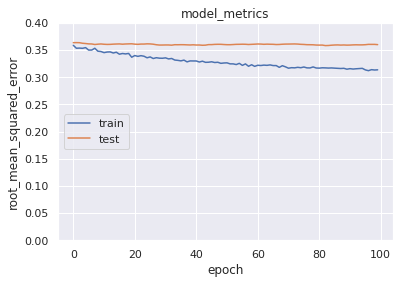

In [42]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

# MEMBUAT TOP 5 REKOMENDASI

In [43]:
# Menyiapkan dataframe
place_df = place[['Place_Id','Place_Name','Category','Rating','Price','Image']]
place_df.columns = ['id','place_name','category','rating','price','image']
df = rating.copy()

In [44]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [45]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [46]:
# Mengambil top 5 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 

print('')
print('----' * 15)
print('Top 5 place recommendation')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ',row.rating, ',', row.image,'\n')

print('==='*15)

4/4 [==============================] - 0s 4ms/step

------------------------------------------------------------
Top 5 place recommendation
------------------------------------------------------------
1 . Pantai Ngrenehan 
     Bahari , Harga Tiket Masuk  3000 , Rating Wisata  4.4 , https://mytrip123.com/wp-content/uploads/2019/05/ff-1.jpg 

2 . Pantai Greweng 
     Bahari , Harga Tiket Masuk  5000 , Rating Wisata  4.6 , https://nginapdijogja.com/wp-content/uploads/2020/10/Pantai-Greweng.jpg 

3 . Galaxy Waterpark Jogja 
     Taman Hiburan , Harga Tiket Masuk  40000 , Rating Wisata  4.3 , https://www.hargatiket.net/wp-content/uploads/2018/09/Wahana-Galaxy-Waterpark-Yogyakarta.jpg 

4 . Heha Sky View 
     Taman Hiburan , Harga Tiket Masuk  15000 , Rating Wisata  4.4 , https://i1.wp.com/advontura.com/wp-content/uploads/2020/10/heha-sky-view-min.jpg?fit=1000%2C562&ssl=1 

5 . Pantai Congot 
     Bahari , Harga Tiket Masuk  3000 , Rating Wisata  4.3 , https://mytrip123.com/wp-content/uplo

In [47]:
# recommended = recommended_place.to_csv('rekomendasi.csv', index=False)

In [48]:
# pd.read_csv('rekomendasi.csv')

In [51]:
import pickle
filename = '../../model/wisata.pkl'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://325fd870-bf80-4506-aa22-86642a4a6980/assets


In [52]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model